In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
ticker_symbol = "AAPL"  # Change this to the stock symbol of your choice
start_date = "2010-01-01"
end_date = "2021-09-01"

df = yf.download(ticker_symbol, start=start_date, end=end_date)
df.head()


C:\Users\deepe\AppData\Roaming\Python\Python312\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409361,447610800


In [3]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409361,447610800


In [4]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


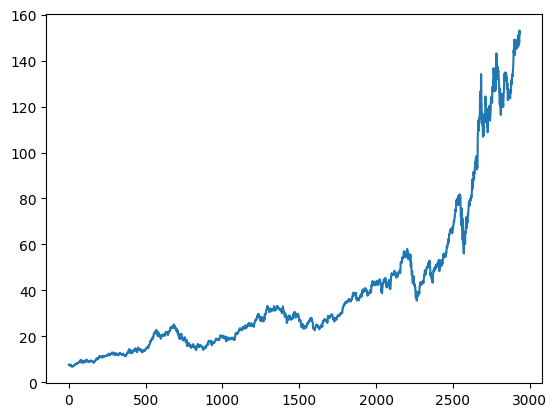

In [5]:
plt.plot(df.Close)

In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2931    136.2069
2932    136.4202
2933    136.6272
2934    136.8548
2935    137.0431
Name: Close, Length: 2936, dtype: float64

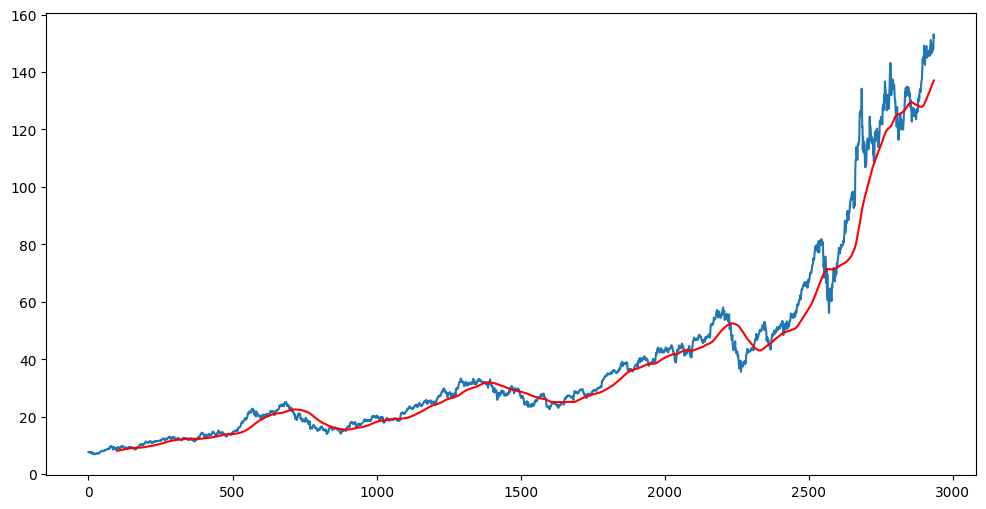

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [8]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2931    131.32230
2932    131.47840
2933    131.64155
2934    131.80970
2935    131.97280
Name: Close, Length: 2936, dtype: float64

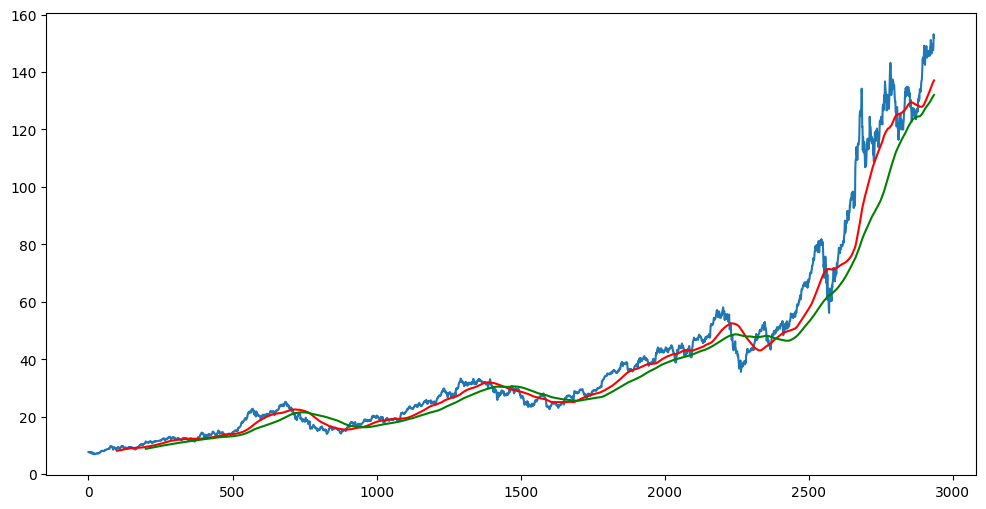

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [10]:
df.shape

(2936, 5)

In [11]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_testing.shape)
print(data_training.shape)

(881, 1)
(2055, 1)


In [12]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [13]:
data_testing.head()

,Close
2055,44.205002
2056,44.167500
2057,43.757500
2058,44.235001
2059,44.994999


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02066297],
       [0.02101112],
       [0.01780253],
       ...,
       [0.99249132],
       [0.97194128],
       [0.97991107]])

In [16]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train ,y_train = np.array(x_train),np.array(y_train)

In [17]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=70, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='linear'))

C:\Users\deepe\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 70)        │        36,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 70)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 80)        │        48,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,641 (854.07 KB)

 Trainable params: 218,641 (854.07 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - loss: 0.0931
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - loss: 0.0134
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.0084
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - loss: 0.0074
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - loss: 0.0065
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - loss: 0.0062
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - loss: 0.0067
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - loss: 0.0065
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - loss: 0.0071
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - loss: 0.0069
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - loss: 0.0056
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - loss: 0.0058
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 202ms/step - loss: 0.0056
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - loss: 0.0057
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/ste

In [21]:
model.save('Keras_model.h5')

In [22]:
data_testing.head()

,Close
2055,44.205002
2056,44.167500
2057,43.757500
2058,44.235001
2059,44.994999


In [24]:
data_training.head(100)

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
95,8.491429
96,8.654286
97,8.812857
98,8.757857


In [25]:
past_100_days = data_training.tail(100)

In [27]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [28]:
final_df.head()

,Close
0,38.959999
1,38.974998
2,39.137501
3,39.000000
4,39.247501


In [29]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02902463],
       [0.02915221],
       [0.03053435],
       [0.02936486],
       [0.03146995],
       [0.0376151 ],
       [0.03886963],
       [0.03735991],
       [0.02932232],
       [0.02989644],
       [0.02972633],
       [0.03170385],
       [0.03023667],
       [0.03236301],
       [0.04435561],
       [0.05215931],
       [0.05709242],
       [0.05252078],
       [0.05511493],
       [0.06444959],
       [0.0681707 ],
       [0.06936145],
       [0.07240214],
       [0.07163666],
       [0.06906376],
       [0.06757533],
       [0.06198302],
       [0.05717749],
       [0.06147272],
       [0.05945266],
       [0.05909119],
       [0.06581045],
       [0.06968042],
       [0.06970167],
       [0.06783048],
       [0.06566163],
       [0.05802801],
       [0.06306748],
       [0.0613664 ],
       [0.05870846],
       [0.05836824],
       [0.05702863],
       [0.05768782],
       [0.05779411],
       [0.06481107],
       [0.06274851],
       [0.06396054],
       [0.063

In [30]:
input_data.shape

(981, 1)

In [31]:
x_test =[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [32]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(881, 100, 1)
(881,)


In [33]:
y_predicted = model.predict(x_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step


In [34]:
y_predicted.shape

(881, 1)

In [35]:
y_test

array([0.07363543, 0.07331646, 0.06982925, 0.07389058, 0.08035466,
       0.08405452, 0.08033341, 0.0770801 , 0.07752662, 0.07618704,
       0.07040337, 0.0702758 , 0.06183419, 0.05668844, 0.04837441,
       0.06502372, 0.05560398, 0.05164897, 0.05441323, 0.05207423,
       0.0557103 , 0.06255714, 0.0650875 , 0.05568905, 0.05924005,
       0.06604435, 0.06432202, 0.0679368 , 0.06919134, 0.07150908,
       0.07665484, 0.07580428, 0.0650875 , 0.05003296, 0.04901232,
       0.04412171, 0.0456314 , 0.04684344, 0.04280339, 0.04905482,
       0.05722002, 0.07310384, 0.07378426, 0.08854112, 0.09136916,
       0.09326161, 0.09604712, 0.10174572, 0.09866252, 0.09772692,
       0.09409088, 0.09779071, 0.09526038, 0.09381445, 0.09662124,
       0.09562186, 0.09817347, 0.09772692, 0.09864127, 0.09719533,
       0.09634481, 0.0950052 , 0.10217101, 0.1055519 , 0.10869888,
       0.11012353, 0.10901785, 0.10527546, 0.10427608, 0.10650875,
       0.10314911, 0.10336176, 0.09919411, 0.09898149, 0.09249

In [36]:
y_predicted

array([[0.07409385],
       [0.07411489],
       [0.07414403],
       [0.07418722],
       [0.07425658],
       [0.0743365 ],
       [0.07442568],
       [0.07452853],
       [0.07464416],
       [0.07476608],
       [0.07493003],
       [0.0751034 ],
       [0.07528403],
       [0.07548289],
       [0.07566604],
       [0.07583255],
       [0.07598397],
       [0.07611857],
       [0.07622501],
       [0.07631837],
       [0.07639489],
       [0.07644594],
       [0.0764728 ],
       [0.07648098],
       [0.07646565],
       [0.0764387 ],
       [0.07640287],
       [0.07634619],
       [0.07628019],
       [0.0762113 ],
       [0.07613326],
       [0.07605173],
       [0.07597835],
       [0.07592403],
       [0.07588445],
       [0.07586436],
       [0.0758483 ],
       [0.07583867],
       [0.07582824],
       [0.07581233],
       [0.07579099],
       [0.07576111],
       [0.07571979],
       [0.07566076],
       [0.0755932 ],
       [0.07552098],
       [0.07545435],
       [0.075

In [37]:
scaler.scale_

array([0.00850539])

In [38]:
scale_faxtor = 1/0.00850539
y_predicted = y_predicted*scale_faxtor
y_test= y_test * scale_faxtor


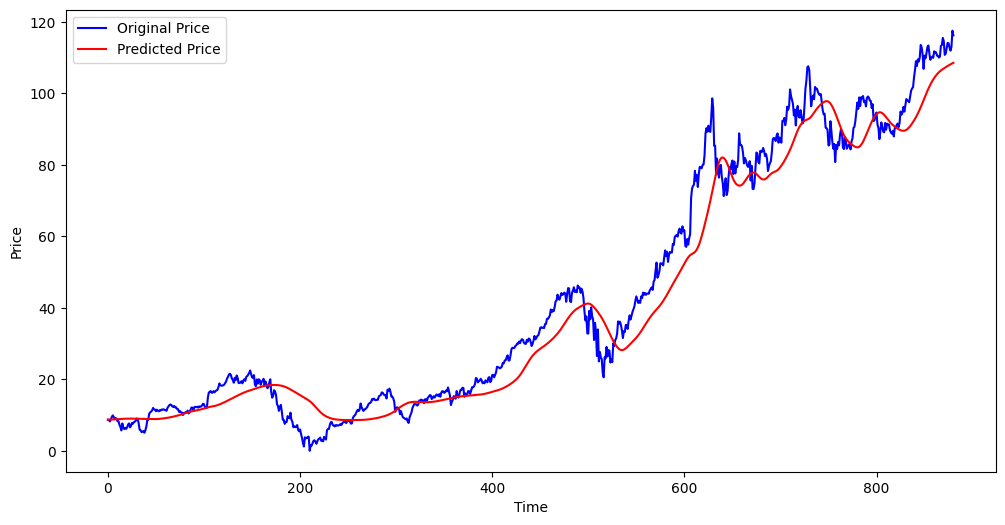

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()